In [ ]:
import random
import pandas as pd
import numpy as np
import os
import librosa

from tqdm.auto import tqdm

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings(action='ignore') 

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [ ]:
CFG = {
    'SR':16000,
    'N_MFCC':32
    
    , # MFCC 벡터를 추출할 개수
    'SEED':41
}

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(CFG['SEED']) # Seed 고정

In [ ]:
def get_mfcc_feature(df, data_type, save_path):
    # Data Folder path
    root_folder = '/content/gdrive/MyDrive'
    if os.path.exists(save_path):
        print(f'{save_path} is exist.')
        return
    features = []
    for uid in tqdm(df['id']):
        root_path = os.path.join(root_folder, data_type)
        path = os.path.join(root_path, str(uid).zfill(5)+'.wav')

        # librosa패키지를 사용하여 wav 파일 load
        y, sr = librosa.load(path, sr=CFG['SR'])
        
        # librosa패키지를 사용하여 mfcc 추출
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=CFG['N_MFCC'])

        y_feature = []
        # 추출된 MFCC들의 평균을 Feature로 사용
        for e in mfcc:
            y_feature.append(np.mean(e))
        features.append(y_feature)
    
    # 기존의 자가진단 정보를 담은 데이터프레임에 추출된 오디오 Feature를 추가
    mfcc_df = pd.DataFrame(features, columns=['mfcc_'+str(x) for x in range(1,CFG['N_MFCC']+1)])
    df = pd.concat([df, mfcc_df], axis=1)
    df.to_csv(save_path, index=False)
    print('Done.')


In [ ]:
train_df = pd.read_csv('/content/train_data.csv')

In [ ]:
get_mfcc_feature(train_df, 'train', './train_mfcc_data.csv')


  0%|          | 0/3805 [00:00<?, ?it/s]

Done.


In [ ]:
pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 4000)

data = pd.read_csv('/content/train_mfcc_data.csv')

In [ ]:
data.columns

Index(['id', 'age', 'gender', 'respiratory_condition', 'fever_or_muscle_pain',
       'covid19', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6',
       'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18',
       'mfcc_19', 'mfcc_20', 'mfcc_21', 'mfcc_22', 'mfcc_23', 'mfcc_24',
       'mfcc_25', 'mfcc_26', 'mfcc_27', 'mfcc_28', 'mfcc_29', 'mfcc_30',
       'mfcc_31', 'mfcc_32'],
      dtype='object')

In [ ]:
data['age'].max()

90

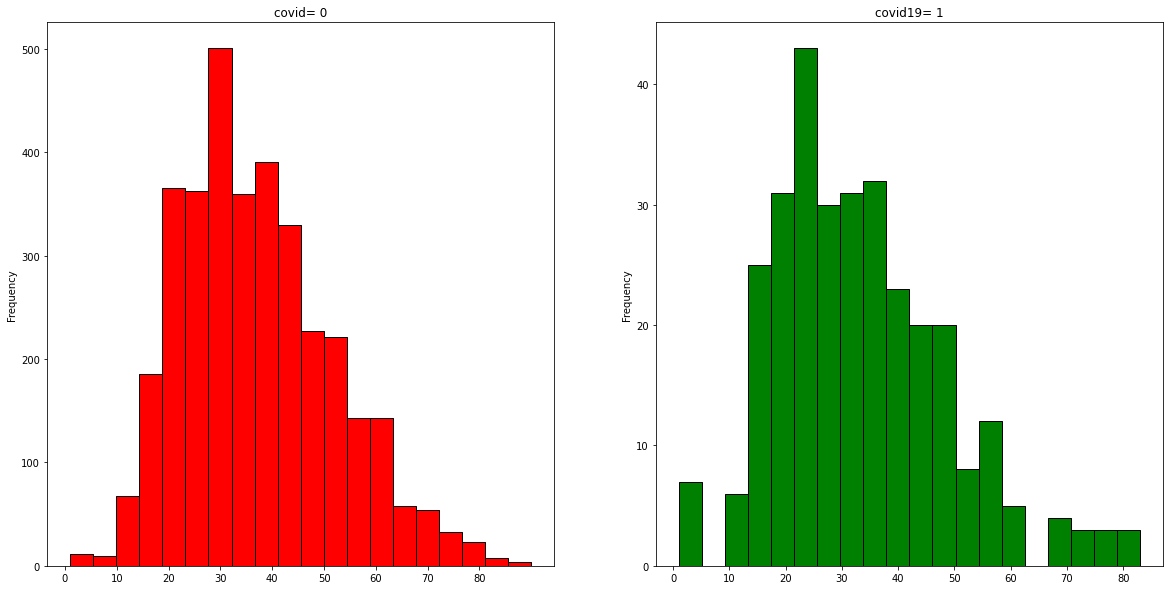

In [ ]:
import matplotlib.pyplot as plt

f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['covid19']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('covid= 0')
x1=list(range(0,90,10))
ax[0].set_xticks(x1)
data[data['covid19']==1].age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('covid19= 1')
x2=list(range(0,90,10))
ax[1].set_xticks(x2)
plt.show()